In [1]:
# Load Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector
import warnings
warnings.filterwarnings("ignore")


# Exploring , Analyzing & Visualizing the Data

In [2]:
# Load Training & Testing data 
data = pd.read_csv('train.csv')
print(data)

test_data = pd.read_csv('test.csv')
print(test_data)




      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

# Total 614 instances in Train data & 367 Instances in Test Data

In [3]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan_Status'}>

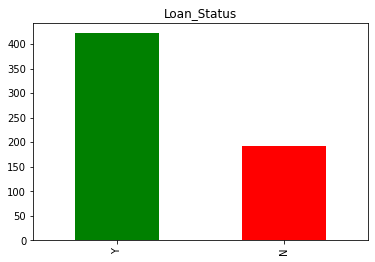

In [4]:
data['Loan_Status'].value_counts().plot.bar(color = ['green','red'], title='Loan_Status')

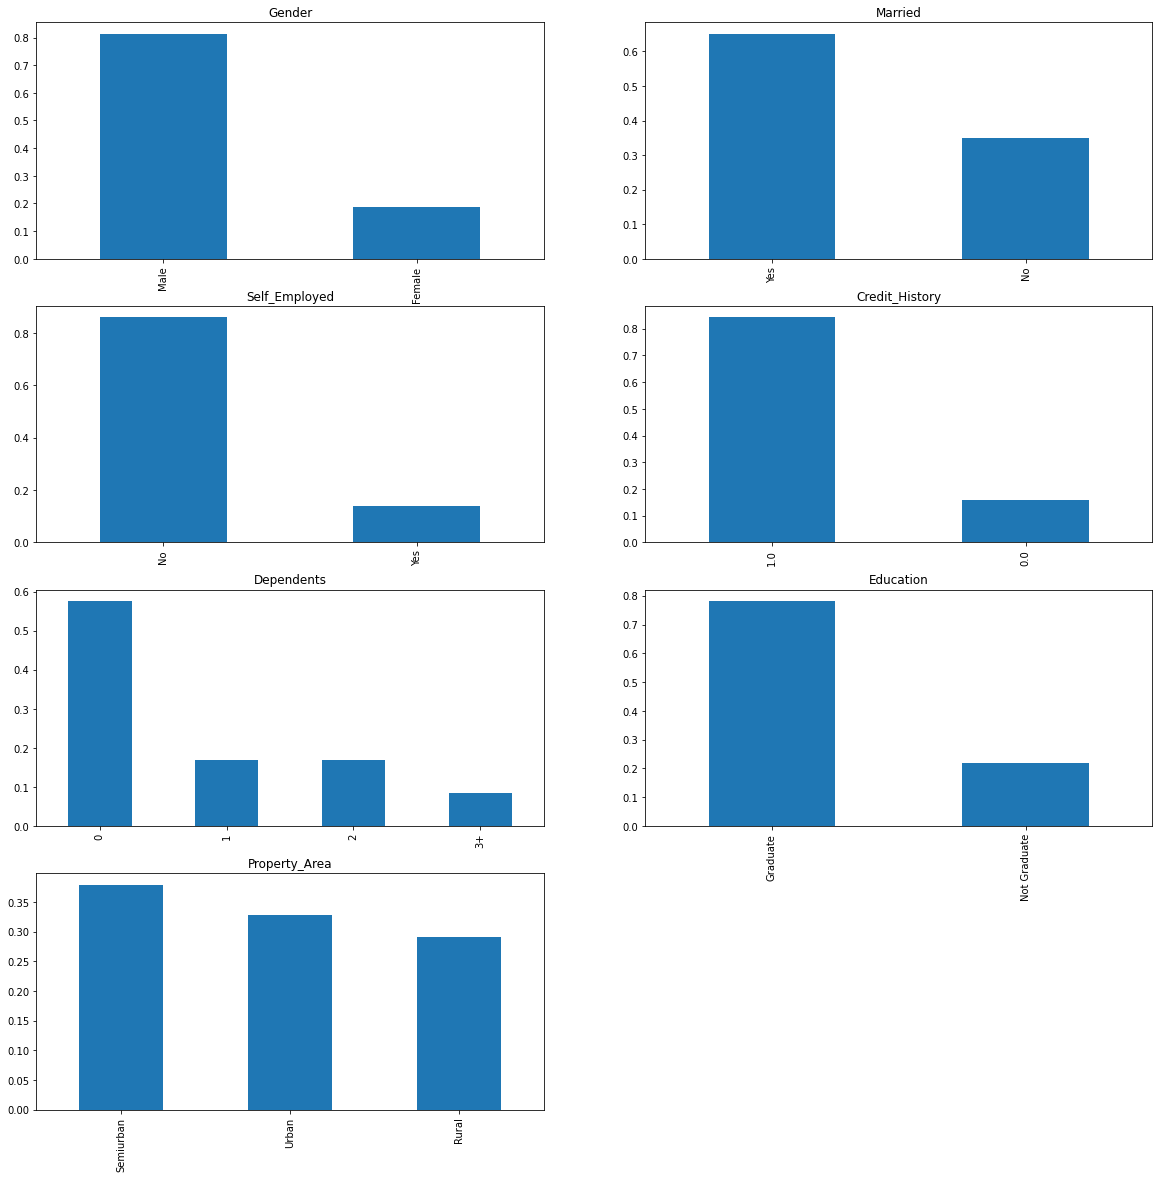

In [5]:
plt.subplot(4,2,1)
data['Gender'].value_counts(normalize=True).plot.bar(figsize =(20,20), title='Gender')

plt.subplot(4,2,2)
data['Married'].value_counts(normalize=True).plot.bar(figsize =(20,20),title='Married')

plt.subplot(4,2,3)
data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize =(20,20),title='Self_Employed')

plt.subplot(4,2,4)
data['Credit_History'].value_counts(normalize=True).plot.bar(figsize =(20,20),title='Credit_History')

plt.subplot(4,2,5)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,20), title='Dependents')

plt.subplot(4,2,6)
data['Education'].value_counts(normalize=True).plot.bar(figsize =(20,20), title='Education')

plt.subplot(4,2,7)
data['Property_Area'].value_counts(normalize=True).plot.bar(figsize =(20,20), title='Property_Area')
plt.show()

# Visualizing the numerical features Frequency distribution and Box Plots

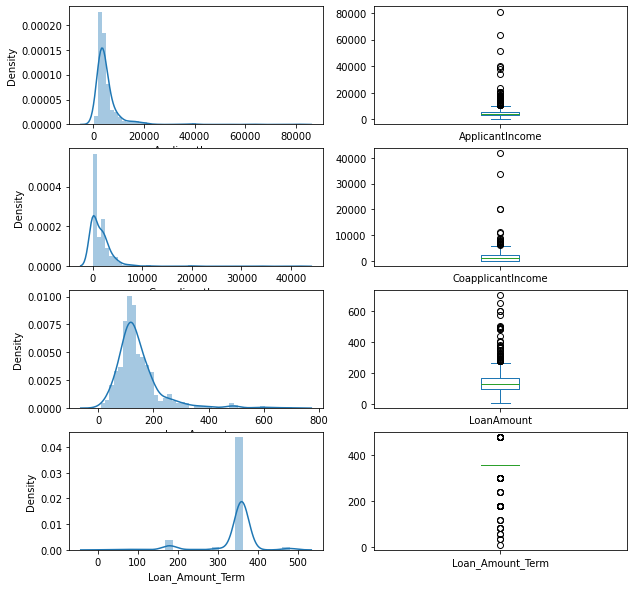

In [6]:
plt.subplot(4,2,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(4,2,2)
data['ApplicantIncome'].plot.box(figsize=(10,10))

plt.subplot(4,2,3)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(4,2,4)
data['CoapplicantIncome'].plot.box()

plt.subplot(4,2,5)
sns.distplot(data['LoanAmount'])


plt.subplot(4,2,6)
data['LoanAmount'].plot.box()

plt.subplot(4,2,7)
sns.distplot(data['Loan_Amount_Term'])



plt.subplot(4,2,8)
data['Loan_Amount_Term'].plot.box()




plt.show()

# BoxPlots above are indicative of outliers 

# Below we check how each Categorical feature relates with the Target Variable

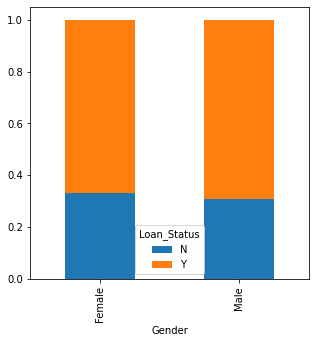

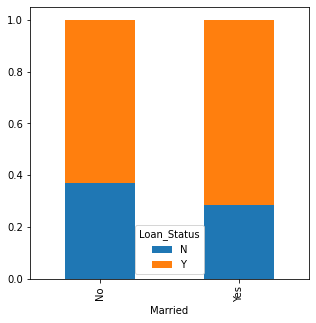

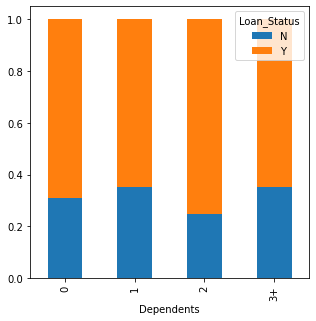

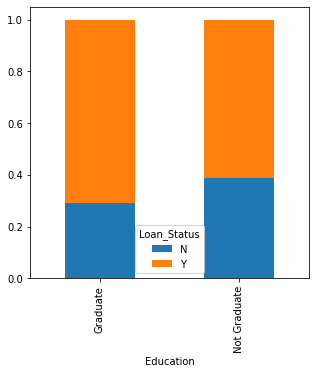

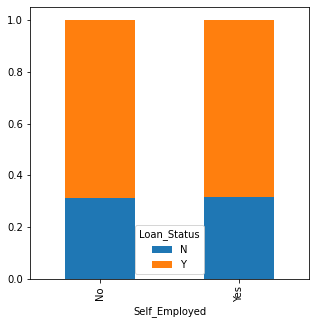

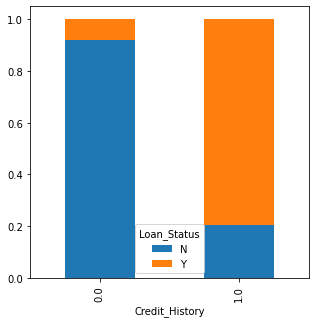

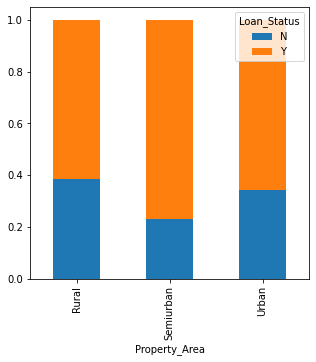

In [7]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])



Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()


Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize = (5,5))
plt.show()

# Points to note from above visualizations. (Gender, Self_Employed, Education, Married) features only have slight impact on Loan_status decision. Vice Versa for Remaining features 


# Checking Null Values in Train & Test set


In [8]:
print(data.isnull().sum())
print(test_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
# Set X and y

data=data.drop('Loan_ID',axis=1)   


y = data[['Loan_Status']]
X = data.drop('Loan_Status',axis=1)

print(X)
print(y)


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [10]:
# Split Train and Test
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, stratify = y, random_state=42)

# Preprocessing using make_column_transformer

In [11]:
# Set variables
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)
imputer_number = SimpleImputer(add_indicator=True, verbose=1, strategy = "median")
imputer_categorical = SimpleImputer(add_indicator=True, verbose=1, strategy = "most_frequent")
scaler = StandardScaler()      #scaling numerical data to z-scores




In [12]:
preprocessing = make_column_transformer(
    (make_pipeline(imputer_categorical,ohe), make_column_selector(dtype_include='object')),
    (make_pipeline(imputer_number, scaler), make_column_selector(dtype_include='int64')),
    (make_pipeline(imputer_number, scaler), make_column_selector(dtype_include='float64')),
    remainder='drop'
)

# Building a machine learning model using make_pipeline (LogisticRegression only)

In [13]:
# Make pipeline
pipe = make_pipeline(preprocessing, LogisticRegression())       #LogisticRegression with default Hyperparamters
                           

# Evaluating the Logistic Regression Model

In [14]:
# Fit model
pipe.fit(X_train, y_train)
print("score : %f" % pipe.score(X_val, y_val.values.ravel()))



score : 0.842365


In [15]:
# Cross-validation
cross_val_score(pipe, X, y.values.ravel(), cv=5, scoring='accuracy')

array([0.78861789, 0.76422764, 0.78861789, 0.85365854, 0.81147541])

# Using Different Hyperparameters with Grid Search CV

In [16]:
self = LogisticRegression()
print(self.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [17]:
# Set params for Grid Search
params = {}
params['logisticregression__C'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
params['logisticregression__max_iter'] = [100,200,300,400,500]
#params['logisticregression__solver'] = ['lbfgs','sag','saga','newton-cg','liblinear']
# Run grid search
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X,y.values.ravel())


print(grid.best_score_)

grid.best_params_


0.8013194722111155


{'logisticregression__C': 0.1, 'logisticregression__max_iter': 100}

# Evaluating the Logistic Regression model again after Grid Search

In [18]:
# Make pipeline after Grid Search
pipe_after_grid_search = make_pipeline(preprocessing, LogisticRegression(C = 0.1,max_iter= 100 ))


In [19]:
#Fit model after Grid Search
pipe_after_grid_search.fit(X_train, y_train.values.ravel())
print(" score : %f" % pipe_after_grid_search.score(X_val, y_val.values.ravel()))

 score : 0.847291


In [20]:
# Cross-validation after Grid Search
cross_val_score(pipe_after_grid_search, X, y.values.ravel(), cv=5, scoring='accuracy')


array([0.79674797, 0.76422764, 0.7804878 , 0.85365854, 0.81147541])

# Predicting results for unseen data

In [21]:
test_loan_status = pipe_after_grid_search.predict(test_data)
test_loan_status

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [22]:
df = pd.DataFrame(test_loan_status, columns = ['Loan_Status'])

In [23]:
final_test_set = pd.concat([test_data, df], axis=1)
final_test_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [24]:
#final_test_set.to_csv('FinalTest.csv')

In [26]:
import pickle

# Saving model to disk
pickle.dump(pipe_after_grid_search, open('model1.pkl','wb'))



In [28]:
# Loading model to compare the results
model = pickle.load(open('model1.pkl','rb'))
print(model.predict(test_data))

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

# Comments: I followed simple procedures as stated in the emailed assingment. Still, the average 5 folds cross validation accuracy was around 80% . I used Stratification while splitting the data as Target Variable was imbalanced

# Further steps to improve the results include:

# 1. Feature Selection techniques (like making a heatmap and choose only one feature of the highly co-related ones to reduce dimensions

# 2. Feature Extraction using PCAS , etc

# 3. Better Scoring technique include, F1 Score, ROC-AUC Score etc

# 4. Better techniques could be used for Data Imputation